$$
\newcommand{\mat}[1]{\boldsymbol {#1}}
\newcommand{\mattr}[1]{\boldsymbol {#1}^\top}
\newcommand{\matinv}[1]{\boldsymbol {#1}^{-1}}
\newcommand{\vec}[1]{\boldsymbol {#1}}
\newcommand{\vectr}[1]{\boldsymbol {#1}^\top}
\newcommand{\rvar}[1]{\mathrm {#1}}
\newcommand{\rvec}[1]{\boldsymbol{\mathrm{#1}}}
\newcommand{\diag}{\mathop{\mathrm {diag}}}
\newcommand{\set}[1]{\mathbb {#1}}
\newcommand{\cset}[1]{\mathcal{#1}}
\newcommand{\norm}[1]{\left\lVert#1\right\rVert}
\newcommand{\pderiv}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\bb}[1]{\boldsymbol{#1}}
\newcommand{\E}[2][]{\mathbb{E}_{#1}\left[#2\right]}
\newcommand{\ip}[3]{\left<#1,#2\right>_{#3}}
\newcommand{\given}[]{~\middle\vert~}
$$

# Tutorial 2: Graph Convolution

In this tutorial, we will discuss the theory of neural networks on graphs and the different definitions for the convolution operator:

1. Spectral convolution
2. Spatial convolution
3. An example

<center><img src="figures/spectral_spatial.jpg" /></center>

## 1. Spectral convolution layer for graphs

### 1.1 Convolutions

So far we have heavily utilized convolutional layers in our deep learning models.
Convolutional layers operate on an input tensor $\vec{x}$ containing $M$ feature maps.
The $j$-th feature map of the output tensor $\vec{y}$ can be written as

$$
\vec{y}^j = \sum_{i=1}^{M} \vec{u}^{ij}\ast\vec{x}^i+b^j,
$$

where $\ast$ denotes convolution, and $x^i$ is the $i$-th input feature map.

Convolutional layers have some important advantages:
    - Number of parameters not dependent on the input dimensions.
    - Parameters shared across the spatial dimensions of the input.
    - Output dimension changes based on input dimension.

#### Convolution in the time and frequency domains

Let's dig deeper into convolutions and what they do. Recall the definition of convolution:

$$
\left\{\vec{u}\ast\vec{x}\right\}_j = \sum_{i} u_{j-i} x_{i}.
$$


<center><img src="figures/conv.gif" width="900" /></center>


### 1.2 How do we convolve in non-euclidean domains ?
<center><img src="figures/dog.jpg" width="300" /></center>

#### The issue at hand:

Euclidean domain (images) adhere to __locality__ and therefore, they can represented using tensors
<center><img src="figures/high_dim_conv.gif"/></center>
This is not the case for non-euclidean domain (graphs)

With the objective of defining a convolution operator in mind, we will use the **convolution theorem**.<br>
As taken from wikipedia:

$$
Conv\left(u,f\right) = \hat{f} * \hat{u} = \cset{F^{-1}}\left(\cset{F}\left(u\right)\cdot\cset{F}\left(f\right)\right)
$$

In order to use said theorem, we will have to define how the Fourier basis in a non-Euclidean domain. <br>
__The eigenvectors of the Laplacian form the Fourier basis.__

Therefore, Our objective is to define the graph laplacian

<center><img src="figures/laplacian_meme.jpg"/></center>

### 1.3 definitions

We will focus our discussion here on Graphs, which are an interesting and useful domain for learning. 
They are also general enough to represent many other non-Euclidean domains,
such as point-clouds and discretized manifolds.

A graph $\cset{G} = (\cset{V},\cset{E}, \mat{A}, \mat{W})$, can be represented with

- A vertex set $\cset{V} = \left\{1,2,\dots,n\right\}$ 
- An edge set $\cset{E}\subseteq \cset{V}\times {V}$
- Vertex-weight matrix $\mat{A}=\mathrm{diag}\left\{a_i\right\}_{i=1}^{n}$.
- Edge-weight matrix $\mat{W}$, where $w_{ij}=0\Rightarrow(i,j)\notin\cset{E}$.

#### Signals/data on graphs

Signals can be defined with the vertices or edges of a graph as their domain.
An appropriate inner-product space can be defined for them.

A **signal** on a graph can defined as a function $f: \cset{V}\rightarrow\set{R}$. (1 feature per node)

We'll represent these as a vector $\vec{f}\in\set{R}^n$, which can be thought of as a single feature map on the graph.

The inner product for the space of vertex signals is
$
\ip{\vec{f}}{\vec{g}}{\ell^2(\cset{V})}=\sum_{i\in\cset{V}} a_i f_i g_i^\ast .
$

Similarly, an **edge signal** (flow) can be defined as an anti-symmetric function $F:\cset{E}\rightarrow\set{R}$,
which can be represented as a matrix $\mat{F}\in\set{R}^{n\times n}$.

The space of edge signals is equipped with the inner product
$
\ip{\mat{F}}{\mat{G}}{\ell^2(\cset{E})}=\sum_{(i,j)\in\cset{E}} w_{ij} F_{ij} G^\ast_{ij} .
$

#### Gradient

<center><img src="figures/gradient_equation.svg" /></center>

<center><img src="figures/gradient.png" /></center>

#### Divergence

<center><img src="figures/divergence_equation.svg" width="600" /></center>

<center><img src="figures/divergence_visualization.png" /></center>

<center><img src="figures/divergence.png" /></center>

#### Laplacian

<center><img src="figures/laplacian_equation.svg" width="200" /></center>

<center><img src="figures/laplacian.png" /></center>

The graph Laplacian, also known as the Laplace-Beltrami operator is a measure of **smoothness** of a a vertex field, i.e. how quickly it changes between **adjacent** vertices.

More formally, it can be defined as an operator over vertex functions, returning a new vertex function: $\Delta:\ell^2(\cset{V})\rightarrow\ell^2(\cset{V})$.
We can write:

$$
\begin{align}
(\Delta \vec{f})_i = \frac{1}{a_i} \sum_{j\neq i} w_{ij}\left(f_i-f_j\right)
&= \frac{1}{a_i}\left(\left(\sum_{j\neq i} w_{ij}\right) f_i - \sum_{j\neq i}w_{ij}f_j\right) \\
&= \frac{1}{a_i}\left(d_i f_i - \sum_{j\neq i}w_{ij}f_j\right).
\end{align}
$$

Where $d_i$ is the generalized degree of node $i$ (sum of touching-edge weights).

We can thus interpret the Laplacian value at a node as the weighted self-value minus weighted neighbor value, which consolidates the notion of a **smooth** function on a graph.

We can represent this operator as a Laplacian matrix $\mat{\Delta} = \mat{A}^{-1}\left(\mat{D}-\mat{W}\right)\in\set{R}^{n\times n}$, where $\mat{D}$ is a diagonal degree matrix.

Usually we don't consider node weights and then the Laplacian matrix is simply:
$$
\mat{\Delta}=\mat{D}-\mat{W}
$$

#### Normalized Laplacian

Sometimes a normalized version of the Laplacian is used instead:

$$
\mat{\tilde\Delta} = \mat{D}^{-1/2} \mat{\Delta} \mat{D}^{-1/2} = I-\mat{D}^{-1/2} \mat{W} \mat{D}^{-1/2}.
$$

__Note: Most of the time $\mat{W}$ is the adjacency matrix of the graph__

<center><img src="figures/math.jpg" /></center>

__We are nearly done with definitions!__

#### Fourier Basis

We can write the eigendecomposition as: $\mat{\Delta}\mat{\Phi} = \mat{\Phi}\mat{\Lambda}$

where as usual $\mat{\Phi}$ contains the eigenvectors of $\mat{\Delta}$ in its columns and $\mat{\Lambda}$ is a diagonal matrix of eigenvalues.

We can thus define the **graph-specific** Fourier basis as these eigenvectors.

The Fourier transforms for a graph function is then,
$$
\begin{align}
(\cset{F}\vec{f}) &= \hat{\vec{f}} = \mattr{\Phi}\vec{f} \\
(\cset{F^{-1}}\hat{\vec{f}}) &= \vec{f} = \mat{\Phi}\hat{\vec{f}}.
\end{align}
$$

Note that the transpose here includes complex conjugation.

__The eigenvectors of the Laplacian form the Fourier basis.__
<center><img src="figures/laplacian_eigenfunctions.png" /></center>

The Fourier transform based on the graph Laplacian (for a graph with a single feature per node):

$$
\hat{f} * \hat{u} = \cset{F^{-1}}\left(\cset{F}\left(u\right)\cdot\cset{F}\left(f\right)\right)
= \cset{F^{-1}}\left\{\mattr{\Phi}\vec{u} \cdot \mattr{\Phi}\vec{f}\right\}
= \cset{F^{-1}}\left\{\mat{\hat u} \cdot \mattr{\Phi}\vec{f}\right\}
= \mat{\Phi}\mat{\hat u}\mattr{\Phi}\vec{f}
$$

__where $\mat{\hat u}$ is a diagonal matrix representing the filter parameters.__

Based on this method for applying a filter on a graph function, we can define our Spectral CNN layer
- Input: vector-valued vertex field: $\mat{X} = (\vec{x}^1, \dots, \vec{x}^m), \vec{x}^i\in\ell^2({\cset{V}})$. Each vertex has $m$ associated features, i.e. our graph has $m$ feature maps.
- Output: vector-valued vertex field $\mat{Y} = (\vec{y}^1, \dots, \vec{y}^{m'}), \vec{y}^i\in\ell^2({\cset{V}})$
    
Thus: $\vec{y}^j = \varphi\left( \sum_{i=1}^{m} \mat{\Phi}\mat{\hat{U}}^{ij}\mattr{\Phi}\vec{x}^i + b^j \right)$.

Unfortunately, this type of graph convolution layer suffers from severely inhibiting **drawbacks**.
- Number of learned parameter depends on domain size $n$ and is not fixed.
- Degree of freedom per eigenvector: potential to create very high frequency (non-smooth) filters. Recall that smoothness in frequency equates to spatial-localization.
- Need to compute both directions of the Fourier transform, each time with $\cset{O}(n^2)$ cost.
- Learned filters are domain-dependent and will not generalize well (i.e. to a different graph).

## 2. Spatial convolution layer for graphs

<center><img src="figures/here_we_go.jpg" width="600"/></center>

To overcome the drawbacks imposed by the Spectral CNN layer, we will first limit our learned parameters to be smooth interpolations of the Laplacian eigenvalues.

This will simultaneously address the first two drawbacks listed above.

We'll define our learned filter parameters as $\hat{\mat u}^{ij}=\mathrm{diag}\{\mat{B}\vec{\alpha}^{ij}\}$, where

$$
\begin{pmatrix}
\hat{u}^{ij}_1\\
\vdots\\
\hat{u}^{ij}_n\\
\end{pmatrix}
=
\begin{pmatrix}
\beta_1(\lambda_1) & \cdots & \beta_q(\lambda_1) \\
\vdots & \ddots & \vdots \\
\beta_1(\lambda_n) & \cdots & \beta_q(\lambda_n) \\
\end{pmatrix}
\begin{pmatrix}
\alpha^{ij}_1\\
\vdots\\
\alpha^{ij}_q\\
\end{pmatrix}.
$$

The $\beta_i(\lambda)$'s are smooth functions such as polynomials.
The number of parameters no longer depends on domain size. 

The second improvement comes from discarding the Fourier transform.
If we select $\beta_k(\lambda)=\lambda^k$, then our spatial filter is

$$
\begin{align}
\mat{u} = \mat{\Phi}\mat{\hat u}\mattr{\Phi}
&= 
\mat{\Phi}
\begin{pmatrix}
\sum_{k=1}^{q}\alpha_k\lambda_1^k &  &  \\
 & \ddots &  \\
 &  & \sum_{k=1}^{q}\alpha_k\lambda_n^k \\
\end{pmatrix}
\mattr{\Phi}
=
\sum_{k=1}^{q}\alpha_k
\mat{\Phi}
\begin{pmatrix}
\lambda_1^k &  &  \\
 & \ddots &  \\
 &  & \lambda_n^k \\
\end{pmatrix}
\mattr{\Phi} \\
&=  \sum_{k=1}^{q}\alpha_k \mat{\Phi} \mat{\Lambda}^k \mattr{\Phi}
= \sum_{k=1}^{q}\alpha_k \mat{\Delta}^k.
\end{align} 
$$

Finally, this gives us a **spatial** (Fourier-free) graph CNN layer:

$$
\vec{y}^j = \varphi\left( \sum_{i=1}^{m} \sum_{k=1}^{q} \alpha^{ij}_k \mat{\Delta}^k \vec{x}^i + b^j \right).
$$

Note:
- The number of parameters depends on q and not on n 
- The powers of the Laplacian matrix $\mat{\Delta}^k$ are local in $k$-rings around each node.
- We're no longer relying on the Laplacian eigendecomposition, but applying a filter directly in the spatial domain.
- Time complexity now depends on the graph Laplacian sparsity.

Instead of using a regular polynomial, we can generalize by applying other functions of the Laplacian. This can be written slightly more generally as:

$\mat{Y}=\varphi\left( \sum_{k=1}^{q} \beta_k(\mat{\Delta}) \mat{X} \mat{\alpha}_k + \vec{b} \right)$

### An example of spatial convolution

We'll now face the problem of classifying nodes in a small social-network graph, where we only have true labels for a tiny subset of the nodes.

In [1]:
import os
import sys
import math
import time
import torch
import numpy as np
import matplotlib.pyplot as plt

#### Dataset
We'll use a toy dataset of a small social network represented as a graph, known as "Zachary's Karate Club" (Zachary, W. W., J. Anthr. R., 1977). The network has two communities which we'll try to detect, by classifying each node as belonging to one of them.

__Story time:__<br>
A social network of a karate club was studied by Wayne W. Zachary for a period of three years from 1970 to 1972. The network captures 34 members of a karate club, documenting links between pairs of members who interacted outside the club. During the study a conflict arose between the administrator "John A" and instructor "Mr. Hi" (pseudonyms), which led to the split of the club into two.

Half of the members formed a new club around Mr. Hi; members from the other part found a new instructor or gave up karate. Based on collected data Zachary correctly assigned all but one member of the club to the groups they actually joined after the split.

In [2]:
# NetworkX is a very useful graph library for python
import networkx as nx

G = nx.karate_club_graph()
ID_INSTR = 0
ID_ADMIN = 33
ID_MEMBERS = set(G.nodes()) - {ID_ADMIN, ID_INSTR}

print(f'{G.name}: {len(G.nodes)} vertices, {len(G.edges)} edges')

Zachary's Karate Club: 34 vertices, 78 edges


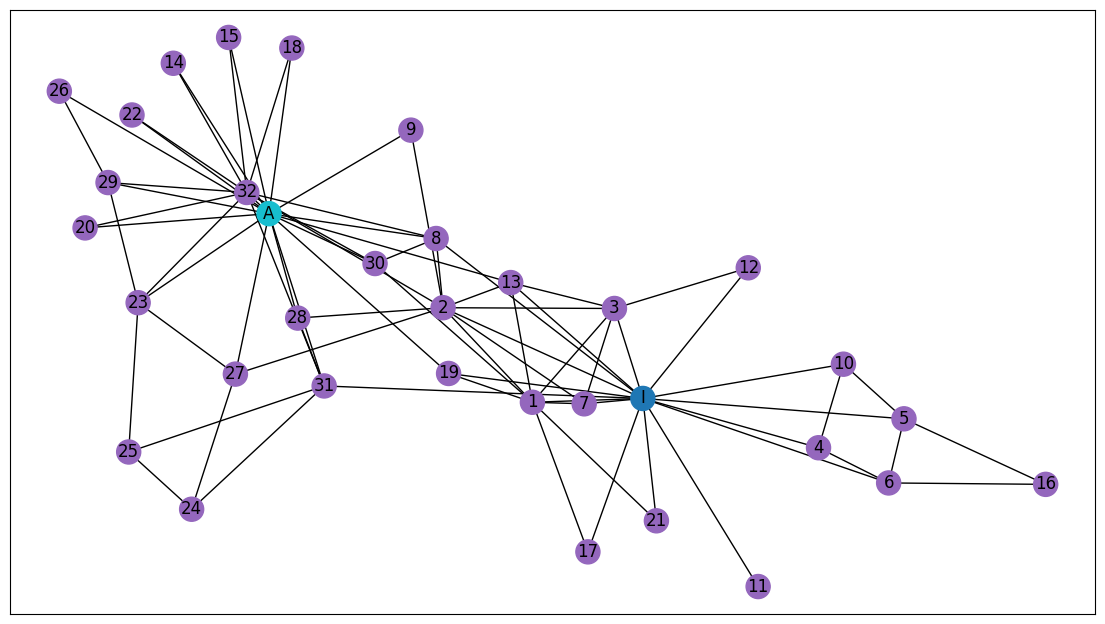

In [3]:
# Visualize the Karate Club graph
fig, ax = plt.subplots(1,1, figsize=(14,8), dpi=100)
pos = nx.spring_layout(G)
cmap = cmap=plt.cm.tab10
node_colors = 0.4*np.ones(G.number_of_nodes())
node_colors[ID_INSTR] = 0.
node_colors[ID_ADMIN] = 1.
node_labels = {i: i for i in ID_MEMBERS}
node_labels.update({i: l for i,l in zip([ID_ADMIN, ID_INSTR],['A','I'])})
nx.draw_networkx(G, pos, node_color=node_colors, labels=node_labels, ax=ax, cmap=cmap);

#### An example of Spectral Convolution

In [4]:
# Adjacency
A = nx.adj_matrix(G, weight=None)
A = np.array(A.todense())
# Degree matrix
dii = np.sum(A, axis=1, keepdims=False)
D = np.diag(dii)
# Laplacian
L = D - A
# Normalize (remember D is diagonal)
D_m_half = np.diag(1/np.sqrt(dii))
L = D_m_half @ L @ D_m_half
w, Phi = np.linalg.eigh(L)

Let's also visualize it's Fourier basis:

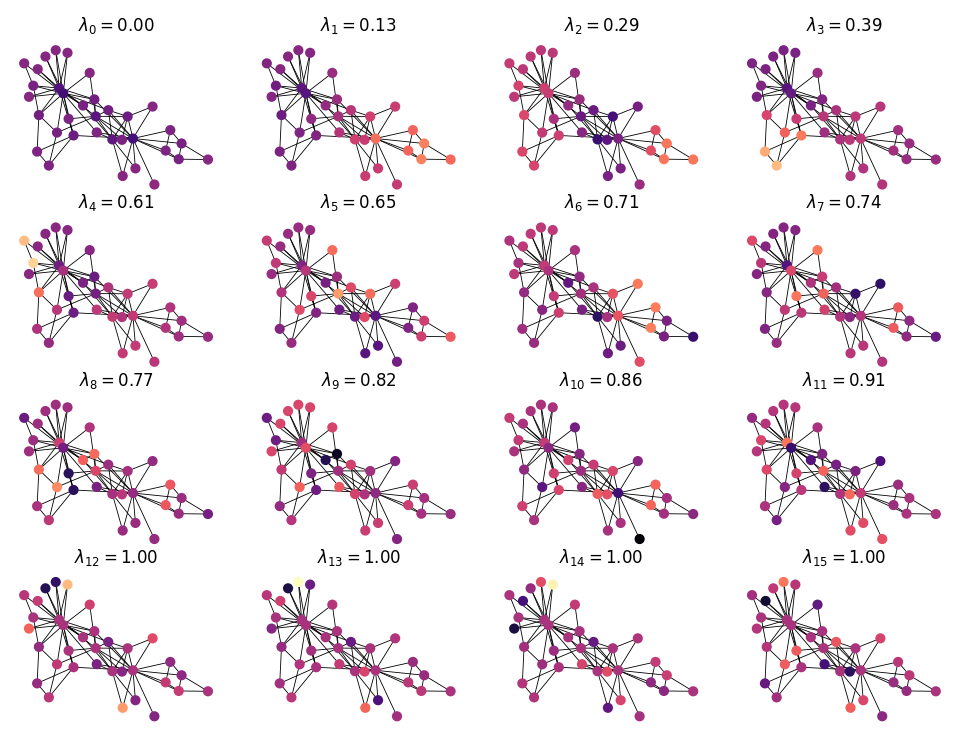

In [5]:
# Plot Fourier basis
fig, ax = plt.subplots(4, 4, figsize=(8,6), dpi=150)
ax = ax.reshape(-1)
vmin, vmax = np.min(Phi), np.max(Phi)
for i in range(len(ax)):
    nc = Phi[:,i]
    nx.draw_networkx(G, pos, node_color=nc, with_labels=False, node_size=15, ax=ax[i], width=0.4, cmap=plt.cm.magma, vmin=vmin, vmax=vmax)
    ax[i].axis('off')
    ax[i].set_title(rf'$\lambda_{{{i}}}={w[i]:.2f}$',fontdict=dict(fontsize=8))

#### Features and targets
* Each node in the graph has an extra attribute, club, representing the member's post-split affiliation.
* We'll save all the labels for test time, but we'll only train on the Instructor and Administrator data.
* Instead of real features for each node (member) we'll just use a one-hot encoding. The purpose is to show that we can classify nodes based on the graph structure alone.

In [6]:
# Labels represent group affiliation
list(G.nodes().data())

[(0, {'club': 'Mr. Hi'}),
 (1, {'club': 'Mr. Hi'}),
 (2, {'club': 'Mr. Hi'}),
 (3, {'club': 'Mr. Hi'}),
 (4, {'club': 'Mr. Hi'}),
 (5, {'club': 'Mr. Hi'}),
 (6, {'club': 'Mr. Hi'}),
 (7, {'club': 'Mr. Hi'}),
 (8, {'club': 'Mr. Hi'}),
 (9, {'club': 'Officer'}),
 (10, {'club': 'Mr. Hi'}),
 (11, {'club': 'Mr. Hi'}),
 (12, {'club': 'Mr. Hi'}),
 (13, {'club': 'Mr. Hi'}),
 (14, {'club': 'Officer'}),
 (15, {'club': 'Officer'}),
 (16, {'club': 'Mr. Hi'}),
 (17, {'club': 'Mr. Hi'}),
 (18, {'club': 'Officer'}),
 (19, {'club': 'Mr. Hi'}),
 (20, {'club': 'Officer'}),
 (21, {'club': 'Mr. Hi'}),
 (22, {'club': 'Officer'}),
 (23, {'club': 'Officer'}),
 (24, {'club': 'Officer'}),
 (25, {'club': 'Officer'}),
 (26, {'club': 'Officer'}),
 (27, {'club': 'Officer'}),
 (28, {'club': 'Officer'}),
 (29, {'club': 'Officer'}),
 (30, {'club': 'Officer'}),
 (31, {'club': 'Officer'}),
 (32, {'club': 'Officer'}),
 (33, {'club': 'Officer'})]

In [7]:
# Input: features will be one-hot vectors (no actual info conveyed)
X = torch.eye(G.number_of_nodes())
print(f"{X=}")

# Create ground-truth labels
labels = [(0 if d['club']=='Mr. Hi' else 1) for i,d in G.nodes().data()]
labels = torch.tensor(labels, dtype=torch.long)
print(f"{labels=}")

X=tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])
labels=tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


#### An example of Spatial Convolution

We'll use a modified version of the normalized graph Laplacian:<br>
$\Delta=D^{-\frac{1}{2}}\hat{A}D^{-\frac{1}{2}}$<br>
Where $\hat{A}=A+\mathbb{1}$ includes self-loops.

In [8]:
# Adjacency matrix
A = nx.adj_matrix(G, weight=None)
A = np.array(A.todense())
I = np.eye(A.shape[0])
A = A + I

# Degree matrix
dii = np.sum(A, axis=1, keepdims=False)
D = np.diag(dii)

# Normalized Laplacian
D_inv_h = np.diag(dii**(-0.5))
L = np.matmul(D_inv_h, np.matmul(A, D_inv_h))

#### Model
We'll implement our graph convolutional network (GCN) directly based on the spatial formula shown above.

I.e., we'll compute simple powers of the Laplacian matrix to locally combine node features.

Our model will have two GCN layers. Each layer takes a tensor containing Cin features for each node, and returns a tensor containing Cout features.

<center><img src="figures/learning.jpg" width="600"/></center>

<center><img src="figures/gcn.png" width="600"/></center>

Recall, our spatial GCN definition was:

$\mat{Y}=\varphi\left(\sum_{k=1}^{q} \beta_k(\mat{\Delta}) \mat{X} \mat{\alpha}_k + \vec{b} \right)$

Where $\mat{\Delta}$ is the $n\times n$ Laplacian, $\mat{X}$ is an $n\times m$ features matrix, and $\mat{\alpha}_k$ is an $m\times m'$ weight matrix.<br>
We'll implement this, with the simple case of $\beta_k(\lambda)=\lambda^k$.

In [9]:
import torch.nn as nn

class GCNLayer(nn.Module):
    def __init__(self, graph_L, in_features, out_features, max_deg=1):
        super().__init__()
        
        self.fc_layers = []
        for i in range(max_deg):
            # Each FC is like the alpha_k matrix, with the last one including bias
            fc = nn.Linear(in_features, out_features, bias=(i==max_deg-1))
            
            self.add_module(f'fc_{i}', fc)
            self.fc_layers.append(fc)
        
        # Pre-calculate beta_k(L)
        self.laplacians = self.calc_laplacian_functions(graph_L, max_deg)
        
    def calc_laplacian_functions(self, L, max_deg):
        res = [L]
        for _ in range(max_deg-1):
            res.append(torch.mm(res[-1], L))
        return res
        
    def forward(self, X):
        Z = torch.tensor(0.)
        for k, fc in enumerate(self.fc_layers):
            L = self.laplacians[k]
            LX = torch.mm(L, X)
            Z = fc(LX) + Z
        
        return torch.relu(Z)

In [10]:
torch.manual_seed(4)

in_features = X.shape[1]
out_features = 2
hidden_dim = 10
graph_L = torch.tensor(L, dtype=torch.float)
max_deg = 2

# Stack two GCN layers as our model
gcn2 = nn.Sequential(
    GCNLayer(graph_L, in_features, hidden_dim, max_deg),
    GCNLayer(graph_L, hidden_dim, out_features, max_deg),
    nn.LogSoftmax(dim=1)
)
gcn2

Sequential(
  (0): GCNLayer(
    (fc_0): Linear(in_features=34, out_features=10, bias=False)
    (fc_1): Linear(in_features=34, out_features=10, bias=True)
  )
  (1): GCNLayer(
    (fc_0): Linear(in_features=10, out_features=2, bias=False)
    (fc_1): Linear(in_features=10, out_features=2, bias=True)
  )
  (2): LogSoftmax(dim=1)
)

#### Training
We'll train as a simple classification task, with the only nuance that only the Instructor and Administrator labels are used.

In [11]:
import torch.nn.functional as F
import torch.optim

def train_node_classifier(model, optimizer, X, y, epochs=60, print_every=10):
    y_pred_epochs = []
    for epoch in range(epochs+1):
        y_pred = model(X)
        y_pred_epochs.append(y_pred.detach())

        # Semi-supervised: only use labels of the Instructor and Admin nodes
        labelled_idx = [ID_ADMIN, ID_INSTR]
        loss = F.nll_loss(y_pred[labelled_idx], y[labelled_idx])

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % print_every == 0:
            print(f'Epoch {epoch:2d}, loss={loss.item():.5f}')
    return y_pred_epochs

In [12]:
optimizer = torch.optim.Adam(gcn2.parameters(), lr=0.01)
y_pred_epochs = train_node_classifier(gcn2, optimizer, X, labels)

Epoch  0, loss=0.70683
Epoch 10, loss=0.42088
Epoch 20, loss=0.17294
Epoch 30, loss=0.04735
Epoch 40, loss=0.01424
Epoch 50, loss=0.00629
Epoch 60, loss=0.00385


Since our loss is calculated based on two samples only, it's not a good criterion of overall classification accuracy.

Let's look at the the accuracy over all nodes:

In [13]:
from sklearn.metrics import classification_report

# Calcualte final classprediction for each node
y_pred = torch.argmax(gcn2(X), dim=1).numpy()
y = labels.numpy()

print(classification_report(y, y_pred, target_names=['I','A']))

              precision    recall  f1-score   support

           I       1.00      0.94      0.97        17
           A       0.94      1.00      0.97        17

    accuracy                           0.97        34
   macro avg       0.97      0.97      0.97        34
weighted avg       0.97      0.97      0.97        34



We can see e.g. overall accuracy of 97% and perfect Precision for the I class, which means there were no false positives for this class. The results are also highly stable between different runs.

<center><img src="figures/done_for_real.jpg" width="600"/></center>